# How to find the optimal number of topics for LDA?

My approach to finding the optimal number of topics is to build many LDA models with different values of number of topics (k) and pick the one that gives the highest coherence value.

Based on [Gensim Topic Modeling](https://www.machinelearningplus.com/nlp/topic-modeling-gensim-python/)

In [16]:
import os
import sys
import matplotlib.pyplot as plt
import gensim
import pyLDAvis
import pyLDAvis.gensim

from gensim import corpora
from gensim import models
from gensim.models.coherencemodel import CoherenceModel

print('Python Version: %s' % (sys.version))
%matplotlib inline

Python Version: 2.7.15 | packaged by conda-forge | (default, Feb 28 2019, 04:00:11) 
[GCC 7.3.0]


In [9]:
dictionary = corpora.Dictionary.load('documents.dict')
corpus = corpora.MmCorpus('documents.mm')
lda_model = models.LdaModel.load('lda_model')
ldamallet = models.wrappers.LdaMallet.load('ldamallet')

print(dictionary)
print(corpus)
print(lda_model)
print(ldamallet)

Dictionary(7714 unique tokens: [u'francesco', u'csuci', u'univesidad', u'sation', u'efimenko']...)
MmCorpus(4 documents, 7714 features, 10760 non-zero entries)
LdaModel(num_terms=7714, num_topics=20, decay=0.5, chunksize=100)


In [4]:
import os
import sys
import matplotlib
import gensim
import pyLDAvis
import pyLDAvis.gensim

from gensim import corpora
from gensim import models
from gensim.models.coherencemodel import CoherenceModel

print('Python Version: %s' % (sys.version))

Choosing a ‘k’ that marks the end of a rapid growth of topic coherence usually offers meaningful and interpretable topics. Picking an even higher value can sometimes provide more granular sub-topics.

If you see the same keywords being repeated in multiple topics, it’s probably a sign that the ‘k’ is too large.

The `compute_coherence_values()` (see below) trains multiple LDA models and provides the models and their corresponding coherence scores.

In [13]:
def compute_coherence_values(dictionary, corpus, texts, limit, start=2, step=3):
    """
    Compute c_v coherence for various number of topics

    Parameters:
    ----------
    dictionary : Gensim dictionary
    corpus : Gensim corpus
    texts : List of input texts
    limit : Max num of topics

    Returns:
    -------
    model_list : List of LDA topic models
    coherence_values : Coherence values corresponding to the LDA model with respective number of topics
    """
    coherence_values = []
    model_list = []
    for num_topics in range(start, limit, step):
        model = gensim.models.wrappers.LdaMallet(mallet_path, 
                                                 corpus=corpus, 
                                                 num_topics=num_topics, 
                                                 id2word=dictionary)
        model_list.append(model)
        coherencemodel = CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())

    return model_list, coherence_values

In [10]:
mallet_path = 'mallet-2.0.8/bin/mallet' # update this path

In [14]:
# Can take a long time to run.
model_list, coherence_values = compute_coherence_values(dictionary=dictionary, 
                                                        corpus=corpus, 
                                                        texts=documents, 
                                                        start=2, limit=40, step=6)

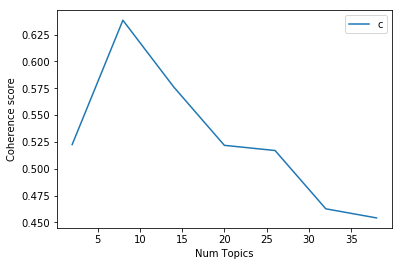

In [17]:
# Show graph
limit=40; start=2; step=6;
x = range(start, limit, step)
plt.plot(x, coherence_values)
plt.xlabel("Num Topics")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"), loc='best')
plt.show()

In [21]:
# Print the coherence scores
count = 0
for m, cv in zip(x, coherence_values):
    print('Model number: ', count, "Num Topics =", m, " has Coherence Value of", round(cv, 4))
    count += 1

('Model number: ', 0, 'Num Topics =', 2, ' has Coherence Value of', 0.5225)
('Model number: ', 1, 'Num Topics =', 8, ' has Coherence Value of', 0.6384)
('Model number: ', 2, 'Num Topics =', 14, ' has Coherence Value of', 0.5763)
('Model number: ', 3, 'Num Topics =', 20, ' has Coherence Value of', 0.5218)
('Model number: ', 4, 'Num Topics =', 26, ' has Coherence Value of', 0.517)
('Model number: ', 5, 'Num Topics =', 32, ' has Coherence Value of', 0.4627)
('Model number: ', 6, 'Num Topics =', 38, ' has Coherence Value of', 0.4542)


In [28]:
# Select the model and print the topics
optimal_model = model_list[1]
model_topics = optimal_model.show_topics(formatted=False)
optimal_model.print_topics(num_words=10)

[(0,
  u'0.046*"para" + 0.031*"aprendizagem" + 0.020*"ncia" + 0.018*"universidad" + 0.018*"tecnologia" + 0.017*"como" + 0.016*"rio" + 0.014*"mai" + 0.011*"seu" + 0.010*"educa"'),
 (1,
  u'0.075*"learn" + 0.034*"univers" + 0.028*"technolog" + 0.027*"educ" + 0.022*"www" + 0.022*"nmc" + 0.021*"org" + 0.018*"digit" + 0.018*"institut" + 0.015*"onlin"'),
 (2,
  u'0.059*"institut" + 0.051*"teach" + 0.051*"learn" + 0.029*"univers" + 0.018*"european" + 0.014*"student" + 0.014*"staff" + 0.013*"programm" + 0.012*"higher" + 0.012*"cours"'),
 (3,
  u'0.041*"student" + 0.034*"http" + 0.015*"higher" + 0.013*"develop" + 0.012*"base" + 0.012*"research" + 0.012*"access" + 0.011*"challeng" + 0.011*"design" + 0.010*"project"'),
 (4,
  u'0.064*"educ" + 0.026*"higher" + 0.018*"trend" + 0.016*"develop" + 0.014*"teach" + 0.014*"approach" + 0.013*"report" + 0.012*"state" + 0.010*"collabor" + 0.009*"role"'),
 (5,
  u'0.034*"uma" + 0.027*"nmc" + 0.021*"est" + 0.018*"org" + 0.014*"ensino" + 0.011*"brasileira" + 0

In [29]:
optimal_model.save('optimal_model')